In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, Column, Integer, String, Float, Date
from sqlalchemy.orm import declarative_base, sessionmaker
from dotenv import load_dotenv
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
load_dotenv()

USER = os.getenv("DB_USER")
PASSWORD = os.getenv("DB_PASSWORD")
HOST = os.getenv("DB_HOST")
DATABASE = os.getenv("DB")

engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}/{DATABASE}")

query = "SELECT * FROM accidents"
df = pd.read_sql(query, engine)

df.head(10)

,id,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,1,2023-07-29 13:00:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INDICATION OF INJURY,0,0,0,0,0,3,13,7,7
1,2,2023-08-13 00:11:00,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,2,0,1,8
2,3,2021-12-09 10:30:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,3,10,5,12
3,4,2023-08-09 19:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NONINCAPACITATING INJURY,5,0,0,5,0,0,19,4,8
4,5,2023-08-19 14:55:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,NO INDICATION OF INJURY,0,0,0,0,0,3,14,7,8
5,6,2023-09-06 00:59:00,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,...,NONINCAPACITATING INJURY,2,0,0,2,0,0,0,4,9
6,7,2022-12-20 11:45:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR TO FRONT,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,2,11,3,12
7,8,2023-09-20 14:38:00,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),"CURVE, LEVEL",DRY,NO DEFECTS,...,NONINCAPACITATING INJURY,1,0,0,1,0,1,14,4,9
8,9,2018-06-04 18:42:00,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,3,18,2,6
9,10,2023-09-07 17:30:00,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,NO INDICATION OF INJURY,0,0,0,0,0,4,17,5,9


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418612 entries, 0 to 418611
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             418612 non-null  int64  
 1   traffic_control_device         418612 non-null  object 
 2   weather_condition              418612 non-null  object 
 3   lighting_condition             418612 non-null  object 
 4   first_crash_type               418612 non-null  object 
 5   trafficway_type                418612 non-null  object 
 6   alignment                      418612 non-null  object 
 7   roadway_surface_cond           418612 non-null  object 
 8   road_defect                    418612 non-null  object 
 9   crash_type                     418612 non-null  object 
 10  intersection_related_i         418612 non-null  object 
 11  prim_contributory_cause        418612 non-null  object 
 12  num_units                     

In [21]:
df.dtypes

id                                        int64
crash_date                       datetime64[ns]
traffic_control_device                   object
weather_condition                        object
lighting_condition                       object
first_crash_type                         object
trafficway_type                          object
alignment                                object
roadway_surface_cond                     object
road_defect                              object
crash_type                               object
intersection_related_i                   object
damage                                   object
prim_contributory_cause                  object
num_units                                 int64
most_severe_injury                       object
injuries_total                            int64
injuries_fatal                            int64
injuries_incapacitating                   int64
injuries_non_incapacitating               int64
injuries_reported_not_evident           

In [39]:
df.size

10465300

In [23]:
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')

fecha_min = df['crash_date'].min()
fecha_max = df['crash_date'].max()

print(f"primera fecha registrada: {fecha_min}")
print(f"ultima fecha registrada: {fecha_max}")


primera fecha registrada: 2013-03-03 16:48:00
ultima fecha registrada: 2025-01-18 00:17:00


In [34]:
df.loc[:, df.select_dtypes(include='number').columns.drop('id')].describe().T

,count,mean,std,min,25%,50%,75%,max
num_units,418612.0,2.063300,0.396011,1.0,2.0,2.0,2.0,11.0
injuries_total,418612.0,0.382717,0.799719,0.0,0.0,0.0,1.0,21.0
injuries_fatal,418612.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,418612.0,0.038102,0.233963,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,418612.0,0.221241,0.614959,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,418612.0,0.121516,0.450864,0.0,0.0,0.0,0.0,15.0
injuries_no_indication,418612.0,2.244002,1.241174,0.0,2.0,2.0,3.0,49.0
crash_hour,418612.0,13.373047,5.603824,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,418612.0,4.144024,1.966861,1.0,2.0,4.0,6.0,7.0
crash_month,418612.0,6.771822,3.427589,1.0,4.0,7.0,10.0,12.0


In [30]:
df.isnull().sum()

id                               0
crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

In [44]:

for col in df.select_dtypes(include=["object","number"]).columns:
    print(f"{col}: {df[col].nunique()} valores únicos")
    print(df[col].value_counts(), "\n")


id: 418612 valores únicos
id
418612    1
1         1
2         1
3         1
418596    1
         ..
9         1
8         1
7         1
6         1
5         1
Name: count, Length: 418612, dtype: int64 

traffic_control_device: 19 valores únicos
traffic_control_device
TRAFFIC SIGNAL              247888
STOP SIGN/FLASHER            98278
NO CONTROLS                  59016
UNKNOWN                       8910
OTHER                         1340
YIELD                          936
PEDESTRIAN CROSSING SIGN       494
OTHER REG. SIGN                362
LANE USE MARKING               306
FLASHING CONTROL SIGNAL        300
POLICE/FLAGMAN                 208
OTHER WARNING SIGN             190
RAILROAD CROSSING GATE         156
SCHOOL ZONE                     66
OTHER RAILROAD CROSSING         46
RR CROSSING SIGN                36
DELINEATORS                     34
NO PASSING                      24
BICYCLE CROSSING SIGN           22
Name: count, dtype: int64 

weather_condition: 12 valores únicos


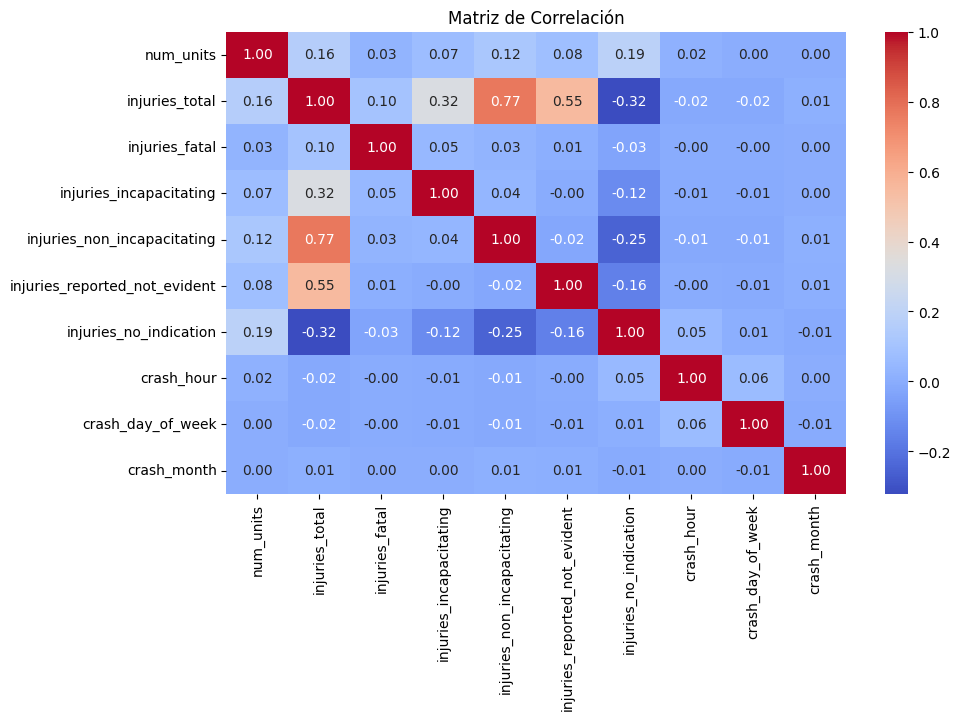

In [8]:
df_numeric = df.select_dtypes(include=["number"]).drop(columns=["id"], errors="ignore")

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()





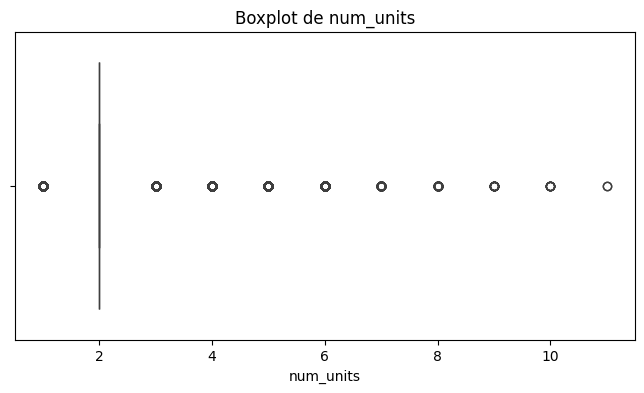

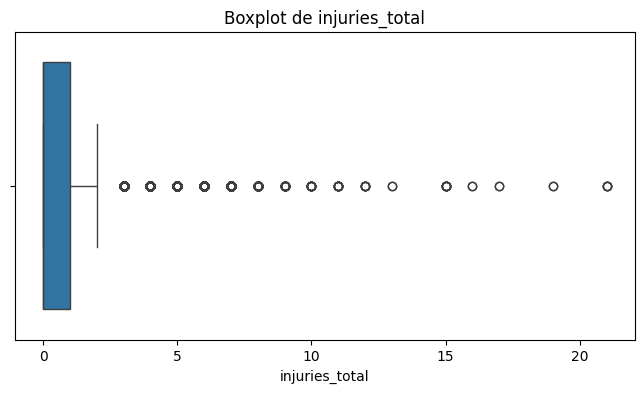

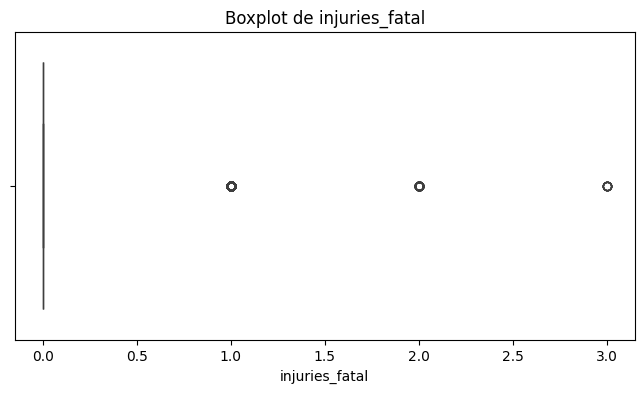

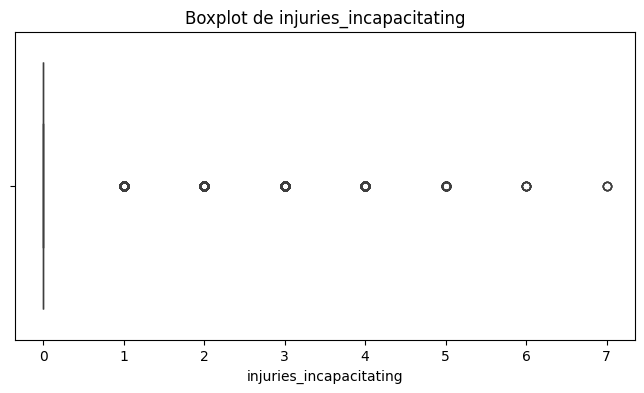

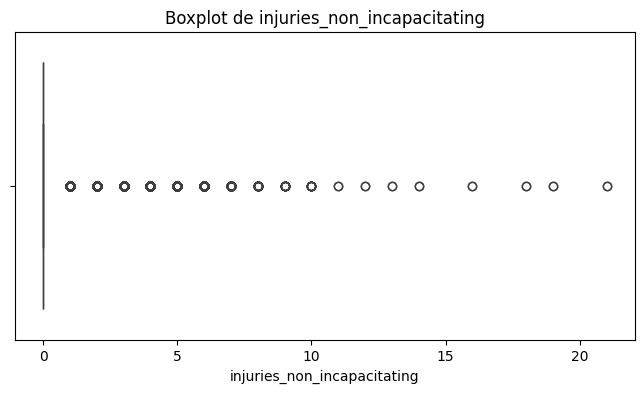

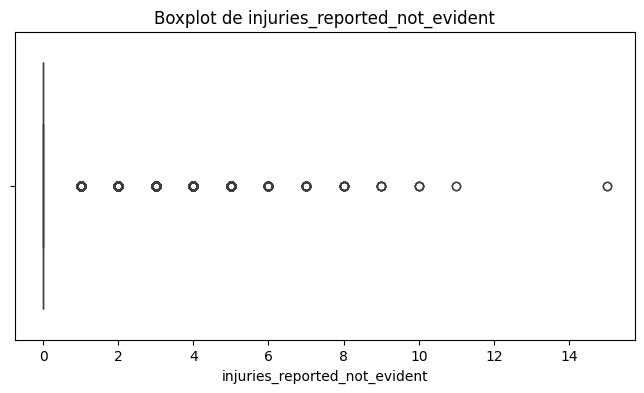

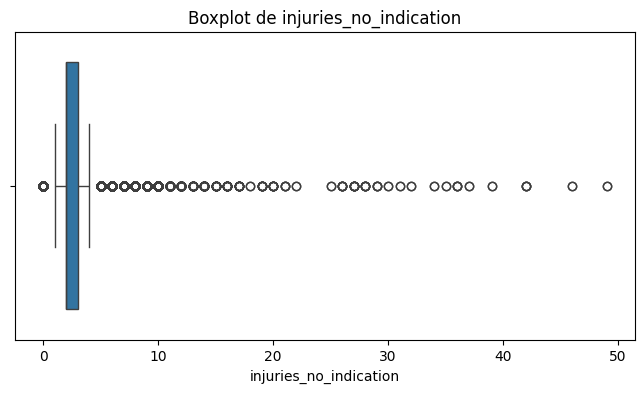

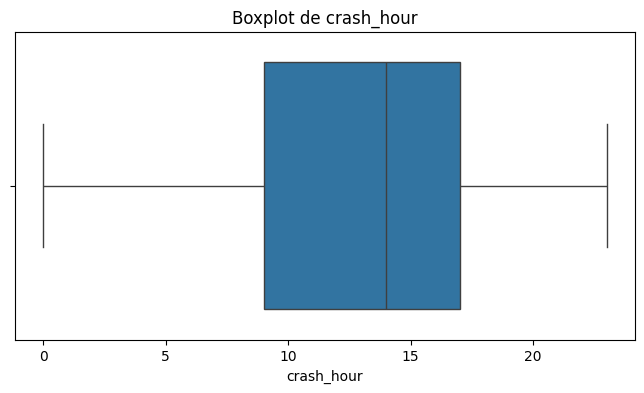

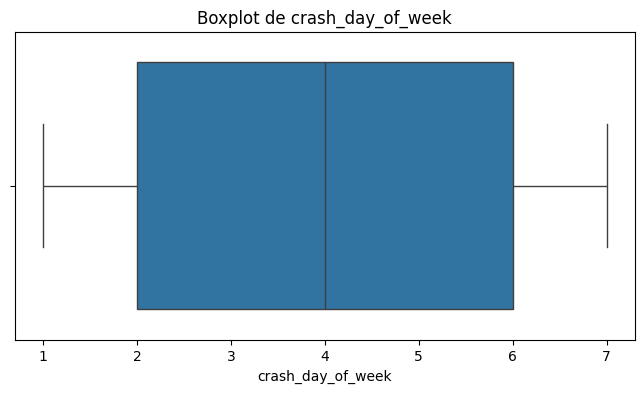

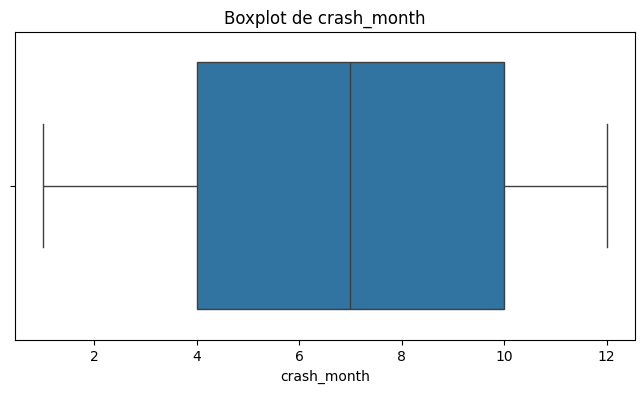

In [9]:
for col in df.select_dtypes(include=["int64", "float64"]).columns.drop("id", errors="ignore"):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()
